In [133]:

import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import pandas as pd

# Data directory
DATA_PATH = Path("./medium_instance_pareto.csv")
#DATA_PATH = Path("C:/Users/ladis/OneDrive/Bureau/sdp_charlotte/optimization-project/solutions_medium.csv")
# on récupère les données et on fait un rapide prétraitement
I=pd.read_csv(DATA_PATH)
#I.loc[:,I.columns[1]] *= -1
I=I.dropna()
print(I.head())
print(I.shape)
mean_of_columns = I.mean()
print(mean_of_columns)

   Unnamed: 0  profit  projects_done  long_proj_duration
1          27   126.0            1.0                 4.0
2          28   168.0            1.0                 5.0
3          29   210.0            1.0                 6.0
4          30   252.0            1.0                 7.0
5          31   294.0            1.0                 8.0
(285, 4)
Unnamed: 0            197.000000
profit                477.789474
projects_done           8.000000
long_proj_duration     13.000000
dtype: float64


Normalisation des données

In [134]:
#on crée une copie pour pas modifier la df de base
I2=I


# on normaliste les scores avec une normalisation simple, on divise juste par le max.
def normalisationbase():
    max1=I2[I.columns[1]].max()
    max2=I2[I.columns[2]].max()
    max3=I2[I.columns[3]].max()

    I2[I.columns[0]]=I2[I.columns[0]]
    I2[I.columns[1]]=I2[I.columns[1]]/max1
    I2[I.columns[2]]=I2[I.columns[2]]/max2
    I2[I.columns[3]]=I2[I.columns[3]]/max3
    return

#normalisation un peu plus avancée, (val-min)/(max-min)
def normalisationavancee():
    max1=I2[I.columns[1]].max()
    max2=I2[I.columns[2]].max()
    max3=I2[I.columns[3]].max()

    min1=I2[I.columns[1]].min()
    min2=I2[I.columns[2]].min()
    min3=I2[I.columns[3]].min()
    
    I2[I.columns[1]]=(I2[I.columns[1]]-min1)/(max1-min1)
    I2[I.columns[2]]=(I2[I.columns[2]]-min2)/(max2-min2)
    I2[I.columns[3]]=(I2[I.columns[3]]-min3)/(max3-min3)
    return

#normalisationbase()
normalisationavancee()

print(I2.head())
print(I2.shape)

   Unnamed: 0    profit  projects_done  long_proj_duration
1          27  0.000000            0.0            0.000000
2          28  0.069652            0.0            0.055556
3          29  0.139303            0.0            0.111111
4          30  0.208955            0.0            0.166667
5          31  0.278607            0.0            0.222222
(285, 4)


On applique des poids arbitraire et on fait un tri entre les scores pondérés !

In [135]:
w1=5
w2=1
w3=1

W= [w1,w2,w3]
#copie de la df
I3=pd.DataFrame(columns=[I.columns[0],I.columns[1],I.columns[2],I.columns[3]])

#on applique les poids à la df
I3[I.columns[0]]=I2[I.columns[0]]
I3[I.columns[1]]=I2[I.columns[1]]*w1
I3[I.columns[2]]=I2[I.columns[2]]*w2
I3[I.columns[3]]=I2[I.columns[3]]*w3


# fonction score où on somme les trois colonnes avec un signe "-" devant la deuxième et la troisième car on veut les minimiser
def g(i):
    return (I3.iloc[i,0],I3.iloc[i,1],I3.iloc[i,2],I3.iloc[i,3],(I3.iloc[i,1]-I3.iloc[i,2]-I3.iloc[i,3]))

#on applique cette fonction score à chaque row de la df et on stock dans un liste scores
scores=[]
for i in range(len(I2)):
    #print(g(i))
    scores.append(g(i))
print(scores[:10])


#on fait un tri 
def getKey(element):
    return element[1]
sorted(scores, key=getKey)
scores_trie=sorted(scores, key=getKey)

# on afficge les 5 premiers
print(scores_trie[0][0],scores_trie[1][0],scores_trie[2][0],scores_trie[3][0],scores_trie[4][0])


[(27, 0.0, 0.0, 0.0, 0.0), (28, 0.3482587064676617, 0.0, 0.05555555555555555, 0.2927031509121062), (29, 0.6965174129353234, 0.0, 0.1111111111111111, 0.5854063018242124), (30, 1.044776119402985, 0.0, 0.16666666666666666, 0.8781094527363184), (31, 1.3930348258706469, 0.0, 0.2222222222222222, 1.1708126036484248), (32, 1.7412935323383085, 0.0, 0.2777777777777778, 1.4635157545605306), (33, 2.08955223880597, 0.0, 0.3333333333333333, 1.7562189054726367), (34, 2.4378109452736316, 0.0, 0.3888888888888889, 2.048922056384743), (35, 2.7860696517412937, 0.0, 0.4444444444444444, 2.3416252072968495), (36, 3.1343283582089554, 0.0, 0.5, 2.6343283582089554)]
27 50 73 96 119


-1.0 4.055555555555555


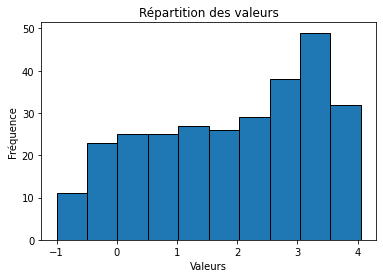

In [136]:
#on récupère les scores pour tracer un histogramme
justscores=[]
for elem in scores:
    justscores.append(elem[4])
min=np.min(justscores)
max=np.max(justscores)
print(min,max)


import matplotlib.pyplot as plt

plt.hist(justscores, bins=10, edgecolor='black')
plt.title("Répartition des valeurs")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.show()

In [137]:
hist, bins = np.histogram(justscores, bins=10)

print("Fréquences d'apparition :", hist)
print("Intervalles de valeurs :", bins)

Fréquences d'apparition : [11 23 25 25 27 26 29 38 49 32]
Intervalles de valeurs : [-1.         -0.49444444  0.01111111  0.51666667  1.02222222  1.52777778
  2.03333333  2.53888889  3.04444444  3.55        4.05555556]


Les poids ont été choisis pour avoir une répartition assez uniforme des valeurs de scores. Ensuite on attribue des valeurs de scores fictives aux instances en utilisant la répartitiion de l'histogramme 

In [138]:
scorespourtrain=[bins[0]]

for i in hist:
    for k in range(i):
        scorespourtrain.append(scorespourtrain[-1]+(bins[-1]-bins[-2])/i)

#print(scorespourtrain)
print(len(scorespourtrain))

286


In [139]:
#on garde que les valeurs des fonctions pour entrainer la regression linéaire
l_train = [(t[1:-1]) for t in scores_trie]
X_train=l_train
Y_train=scorespourtrain[:-1]

print(len(X_train)==len(Y_train))


True


In [140]:
from sklearn.linear_model import LinearRegression

#regression linéaire
reg = LinearRegression().fit(X_train, Y_train)

# Affichage des coefficients (poids)
print("Les poids sont :", reg.coef_)



Les poids sont : [0.71554641 0.27353372 0.68831036]


On cherche à regarder si la régression linéaire a été efficace en regardant l'écart entre le score supposé et le score prédit.

In [141]:
scorespred=[]

def dot_product(list1, list2):
    return sum(x * y for x, y in zip(list1, list2))

for elem in l_train:
    scorespred.append(dot_product(elem,[reg.coef_[0],-reg.coef_[1],-reg.coef_[2]]))

compar=[]
for i in range(len(scorespourtrain)-1):
    compar.append(np.maximum(scorespourtrain[i],scorespred[i])-np.minimum(scorespourtrain[i],scorespred[i]))


print(np.mean(compar))


0.4570873014274961


la moyenne des écarts est de 0.45 c'est satisfaisant, si c'était aléatoire on aura une moyenne d'écart de 2,5 (car max-min = 5)

On trace ici l'ensemble des instances

C:\Users\ladis\AppData\Local\Temp/ipykernel_57828/4136973032.py:25: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  figure = plt.figure().gca(projection="3d")


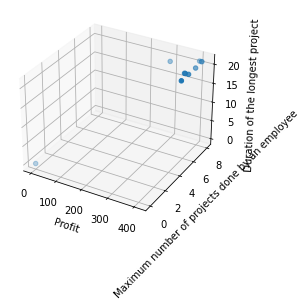

In [142]:
"""Contain plot functions."""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

DATA = Path("C:/Users/ladis/OneDrive/Bureau/sdp_charlotte/optimization-project/solutions_medium.csv")
sol=I=pd.read_csv(DATA)

def plot(solution: np.ndarray):
    schedule = np.zeros((solution.shape[0], solution.shape[3]))
    for i in range(schedule.shape[0]):
        for j in range(schedule.shape[1]):
            for k in range(solution.shape[2]):
                if np.sum(solution[i, :, k, j]) > 0:
                    schedule[i, j] = k
    plt.imshow(schedule)
    plt.xlabel("Time (days)")
    plt.ylabel("Employees")
    plt.colorbar()
    plt.show()


def plot_pareto_surface(pareto_sol: pd.DataFrame):
    figure = plt.figure().gca(projection="3d")
    figure.scatter(
        -pareto_sol[sol.columns[1]],
        pareto_sol[sol.columns[2]],
        pareto_sol[sol.columns[3]],
    )
    figure.set_xlabel("Profit")
    figure.set_ylabel("Maximum number of projects done by an employee")
    figure.set_zlabel("Duration of the longest project")
    plt.show()

plot_pareto_surface(sol)